In [17]:
# KNN pe regresie      Regresia liniara  caz : Pret apartamete 
# la regresie calculam eroare pentru a vedea cit de bine  lucreaza antrenarea
# mse  eroare patratica medie 

# importam bibliotecile 

import pandas as pd                      # lucru cu dataframe-uri si tabele de date excelul 
import numpy as np                       # lucru cu algebra liniara si matrici
import matplotlib.pyplot as plt          # pentru vizualiazarea matricilor 
import seaborn as sns                    # pentru vizualizarea matricilor

from sklearn.model_selection import train_test_split     # 
from sklearn.metrics import mean_squared_error           #   pentru calcularea erorii medie la patrat 
from sklearn.metrics import mean_absolute_error          # eroarea absoluta  

from sklearn.neighbors import KNeighborsRegressor        #  model 1 Regresie pe knn  doua modele care fac acelasi lucru dar diferit 
from sklearn.linear_model import LinearRegression        #  model 2  Regresie liniara 


# sklearn lucreaza cu arry din numpy 


# incarcam data setul - datele din fisier 

datele = pd.read_csv ('apartamente.csv')            # incarcam datele din fisier in variabila datele

print ('------------------------------------------Datele din tabel - toate \n\n', datele)                               # afisam continutul variabile la ecran, datele din fisier
                                             # tabelul are 12 coloane si 1599 de inregistrari   
print ('\n\n--------------------------------------Informati despre tipul de date \n\n')    

print (datele.info())            # este recomandat sa se verifice tipul datelor din tabel - tipul de date pentru fiecare coloana  

print ('\n--------------------------------------Informatii despre date lipsa  \n\n\n')

print (datele.isna().sum() )    #  pentru a verifica daca sunt coloane in care sunt valori lipsa,  valorile lipsa se exerseaza aparte 


#####################################################################################################
X = datele.drop (['price','cityCode'], axis = 1).values          # X  datele pe care le analizam 
y = datele['price'].values                                         # y  coloana pe care o prezicem

print (' X - Valorile din tabel fara ultima coloana\n')
print (X)
print ('\n Y -Valorile din ultima coloana pe care o prezicem\n ')
print (y)


------------------------------------------Datele din tabel - toate 

       squareMeters  numberOfRooms  hasYard  hasPool  floors  cityCode  \
0            75523              3        0        1      63      9373   
1            80771             39        1        1      98     39381   
2            55712             58        0        1      19     34457   
3            32316             47        0        0       6     27939   
4            70429             19        1        1      90     38045   
...            ...            ...      ...      ...     ...       ...   
9995          1726             89        0        1       5     73133   
9996         44403             29        1        1      12     34606   
9997         83841              3        0        0      69     80933   
9998         59036             70        0        0      96     55856   
9999          1440             84        0        0      49     18412   

      cityPartRange  numPrevOwners  made  isNewBuilt 

Prezicerea 
 [7964651.78 3698491.04 8566731.24 ...  513518.06 2775051.96 5981574.52]

 Eroarea medie la patrat  715930747.8081433

 Eroarea absoluta  21063.957848000013



        y testat    y prezis
0     7964369.6  7964651.78
1     3713548.9  3698491.04
2     8553019.2  8566731.24
3     6428666.2  6418510.74
4     6465184.9  6482812.16
...         ...         ...
2495  5161447.9  5207147.86
2496  7248658.3  7240321.64
2497   541400.2   513518.06
2498  2744762.0  2775051.96
2499  6000826.1  5981574.52

[2500 rows x 2 columns]


---------------------------------------------------------------------Vizualizare grafica  y  testat si  y prezis 


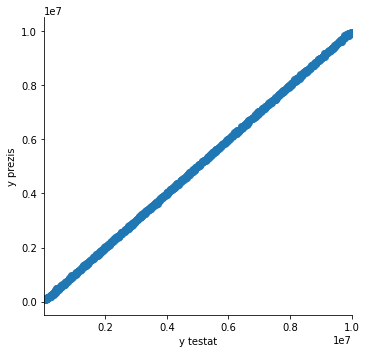

In [18]:
# impartim tabelul in antrenare si testare        testare pentru a verifica cit de bine lucreaza modelul

Xa, Xt, ya, yt = train_test_split (X,y,random_state = 42) 



# Metoda I     Knn pe regresie  

knn = KNeighborsRegressor ()

knn.fit (Xa, ya)                       # potrivim datele antrenate si rezultatele antrenate   

yp = knn.predict (Xt)

print ('Prezicerea \n',yp )

# la regresie calculam eroare pentru a vedea cit de bine  lucreaza antrenarea
# mse  eroare patratica medie 
#  intre y prezis si y testare, y prezis in baza la X testare 

print ('\n Eroarea medie la patrat ',  mean_squared_error(yp, yt))
print ('\n Eroarea absoluta ', mean_absolute_error (yp,yt) )

#######################################################################################################################3

# formam un nou tabel din 2 coloane y testat si y prezis 
tabel = pd.DataFrame (yt,columns = ['y testat'])
tabel ['y prezis']=yp
print ('\n\n\n',tabel)


print ('\n\n---------------------------------------------------------------------Vizualizare grafica  y  testat si  y prezis ')

graficul = sns.lmplot (data=tabel, x='y testat', y = 'y prezis')   # unghiul de inclinare trebuie sa fie aroximativ 45 grade
print (graficul )


Eroarea medie la patrat pentru regresia liniara  3633757.398033838

Eroarea absoluta pentru regresia liniara  1491.2267018862021


        y testat      y prezis
0     7964369.6  7.962609e+06
1     3713548.9  3.715865e+06
2     8553019.2  8.553872e+06
3     6428666.2  6.430605e+06
4     6465184.9  6.465219e+06
...         ...           ...
2495  5161447.9  5.161598e+06
2496  7248658.3  7.247276e+06
2497   541400.2  5.411532e+05
2498  2744762.0  2.745048e+06
2499  6000826.1  6.002032e+06

[2500 rows x 2 columns]


--------------------------------------------------------------------Vizualizare grafica  y  testat si  y prezis 


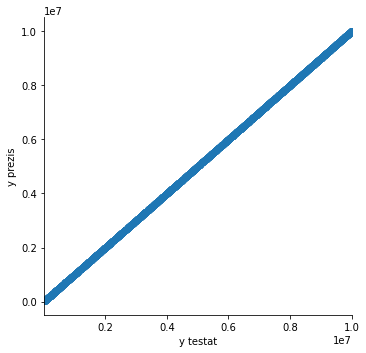

In [19]:
# Metoda a 2 - Regresia Liniara    la acet model se tinde ca eroare medie la patrat sa fie mai mica 
# Aceest algoritm este mai bun pentru ca are eroarea mai mica 
# Aceasta metoda lucreaza mai bine decit KNN regresion 

regresieliniara = LinearRegression()
regresieliniara.fit (Xa,ya)

yp= regresieliniara.predict(Xt)

print ('\nEroarea medie la patrat pentru regresia liniara ', mean_squared_error(yp, yt))  
print ('\nEroarea absoluta pentru regresia liniara ', mean_absolute_error(yp, yt))


# formam un nou tabel din 2 coloane y testat si y prezis 
tabel = pd.DataFrame (yt,columns = ['y testat'])
tabel ['y prezis']=yp

print ('\n\n',tabel)


print ('\n\n--------------------------------------------------------------------Vizualizare grafica  y  testat si  y prezis ')

graficul = sns.lmplot (data=tabel, x='y testat', y = 'y prezis')   # unghiul de inclinare trebuie sa fie aroximativ 45 grade
print (graficul )
